In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
datafile = "./data/housing.data"
data = np.fromfile(datafile, sep=" ")

# 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
feature_names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
feature_num = len(feature_names)

# 将原始数据进行Reshape，变成[N, 14]这样的形状
data = data.reshape([data.shape[0] // feature_num, feature_num])

# 将原数据集拆分成训练集和测试集
# 这里使用80%的数据做训练，20%的数据做测试
# 测试集和训练集必须是没有交集的
ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]

# 计算训练集的最大值，最小值，平均值
maximums, minimums, avgs = (
    training_data.max(axis=0),
    training_data.min(axis=0),
    training_data.sum(axis=0) / training_data.shape[0],
)

# 对数据进行归一化处理
for i in range(feature_num):
    # print(maximums[i], minimums[i], avgs[i])
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

# 训练集和测试集的划分比例
training_data = data[:offset]
test_data = data[offset:]
print(training_data.shape, test_data.shape)

(404, 14) (102, 14)


In [11]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                if epoch_id % 5 == 0:
                    print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                    format(epoch_id, iter_id, loss))
        
        return losses, gradient_w, gradient_b

Epoch   0 / iter   0, loss = 7.6669
Epoch   0 / iter   1, loss = 2.9911
Epoch   0 / iter   2, loss = 1.6080
Epoch   0 / iter   3, loss = 0.7959
Epoch   0 / iter   4, loss = 0.6848
Epoch   5 / iter   0, loss = 0.2201
Epoch   5 / iter   1, loss = 0.2803
Epoch   5 / iter   2, loss = 0.2171
Epoch   5 / iter   3, loss = 0.1695
Epoch   5 / iter   4, loss = 0.2257
Epoch  10 / iter   0, loss = 0.1786
Epoch  10 / iter   1, loss = 0.1522
Epoch  10 / iter   2, loss = 0.1903
Epoch  10 / iter   3, loss = 0.1675
Epoch  10 / iter   4, loss = 0.2534
Epoch  15 / iter   0, loss = 0.1392
Epoch  15 / iter   1, loss = 0.1800
Epoch  15 / iter   2, loss = 0.1223
Epoch  15 / iter   3, loss = 0.1225
Epoch  15 / iter   4, loss = 0.5870
Epoch  20 / iter   0, loss = 0.1020
Epoch  20 / iter   1, loss = 0.1320
Epoch  20 / iter   2, loss = 0.1242
Epoch  20 / iter   3, loss = 0.0933
Epoch  20 / iter   4, loss = 0.1847
Epoch  25 / iter   0, loss = 0.1107
Epoch  25 / iter   1, loss = 0.0907
Epoch  25 / iter   2, loss =

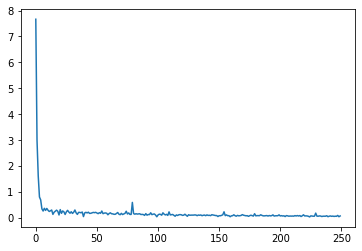

[[ 0.02347155]
 [ 0.        ]
 [ 0.03400123]
 [ 0.        ]
 [ 0.03287132]
 [-0.00114914]
 [ 0.0147603 ]
 [ 0.00375224]
 [ 0.07182352]
 [ 0.05128226]
 [ 0.00275917]
 [ 0.02246334]
 [ 0.01574529]] 0.020040906449618506


In [42]:
# 创建网络
net = Network(13)
# 启动训练
losses, w, b = net.train(training_data, num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()
print(w,b)

In [43]:
x = test_data[:,:-1]
y = test_data[:,-1:]
y_pre = np.dot(x, w)+b
print(x.shape, y.shape, y_pre.shape)

(102, 13) (102, 1) (102, 1)


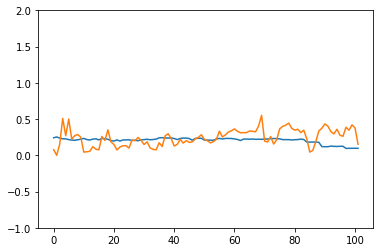

In [44]:
t = range(x.shape[0])
plt.ylim(-1,2)
plt.plot(t, y_pre, label="predict price")
plt.plot(t, y, label="true price")